#Audio Corpus creation and binary classification using


In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import os

In [ ]:
from glob import glob


In [ ]:
filename='/content/D3.mp3'

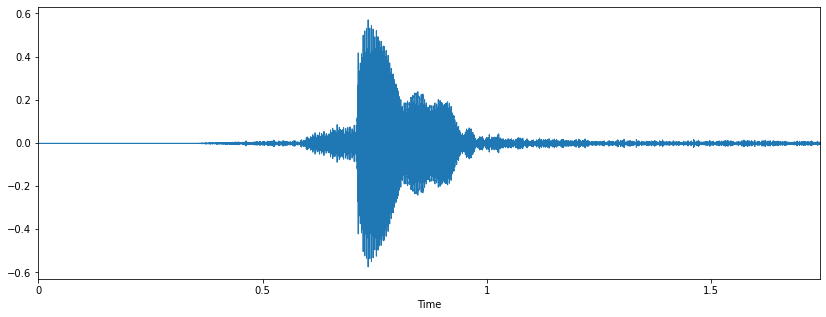

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00293481,
       -0.0036219 , -0.00387417], dtype=float32)

In [ ]:
stftt = librosa.feature.chroma_stft(y=data,sr=sample_rate)
stftt.shape

(12, 76)

In [ ]:
import pandas as pd
import os
import librosa
audio_dataset_path='/content/D3.mp3'
metadata=pd.read_csv('metadataa.csv')
metadata.head()

,filename,fold,classID,class
0,D1.mp3,1,0,ding
1,D2.mp3,1,0,ding
2,D3.mp3,1,0,ding
3,D4.mp3,1,0,ding
4,D5.mp3,1,0,ding


In [ ]:
def features_extractor(file):
 audio, sample_rate = librosa.load(file_name)
 stftt_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
 stftt_scaled_features = np.mean(stftt_features.T,axis=0)
 
 return stftt_scaled_features


In [ ]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
 file_name = row[0]
 final_class_labels=row[1]
 data=features_extractor(file_name)
 extracted_features.append([data,final_class_labels])

21it [00:03,  5.87it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.28620476, 0.16955574, 0.13980055, 0.1389648...",1
1,"[0.34257823, 0.3037798, 0.2947054, 0.40227482,...",1
2,"[0.47993726, 0.40231654, 0.33326358, 0.3189040...",1
3,"[0.53283787, 0.42432126, 0.4381694, 0.36399537...",1
4,"[0.19497062, 0.18591516, 0.22059758, 0.2983776...",1


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(21, 12)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 12)
(15,)
(6, 12)
(6,)


In [ ]:
batch_size=132
num_labels = y.shape[0]

In [ ]:
model=Sequential()
model.add(Dense(128, activation='tanh', input_shape=(12,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=50 , verbose=2,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-traina

In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
print("loss ", score[0])
print("accuracy ",score[1])

loss  0.7304034233093262
accuracy  0.3333333432674408


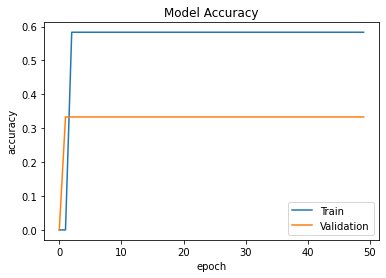

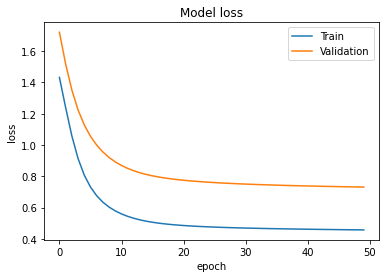

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)*1
y_pred


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
y_pred = model.predict(X_test).round()
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,921
Trainable params: 2,921
Non-traina

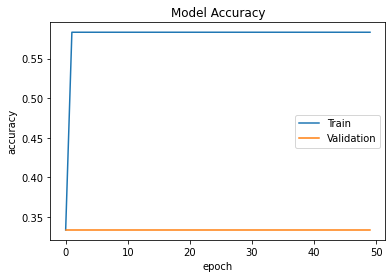

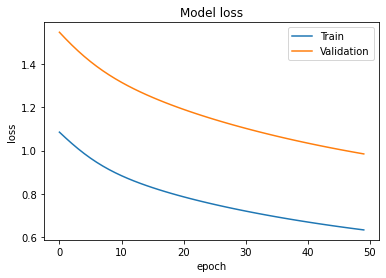

In [ ]:
c_model(8)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1664      
                                                                 
 dense_13 (Dense)            (None, 16)                2064      
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-traina

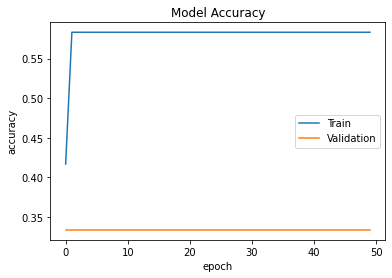

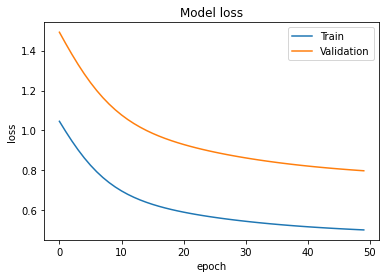

In [ ]:
c_model(16)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1664      
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,177
Trainable params: 8,177
Non-traina

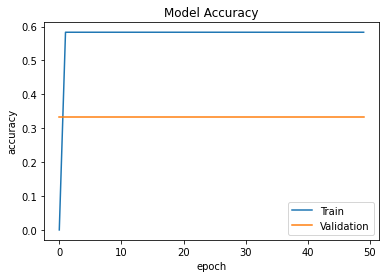

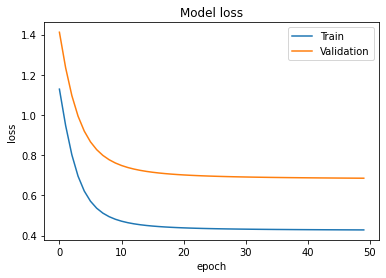

In [ ]:
c_model(32)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1664      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,769
Trainable params: 18,769
Non-trai

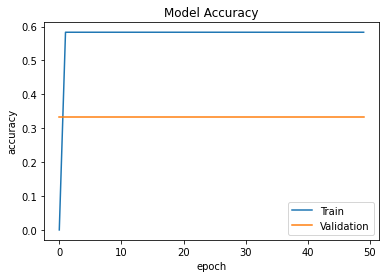

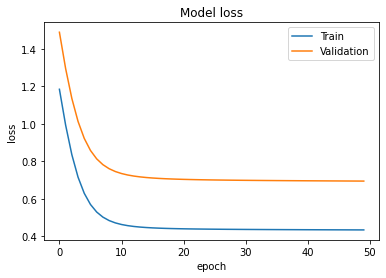

In [ ]:
c_model(64)


In [ ]:
def c_layer(n):
 model=Sequential()
 model.add(Dense(128, activation='tanh', input_shape=(12,)))
 for i in range(0,n):
     model.add(Dense(32, activation='tanh'))
 
 model.add(Dense(1, activation='sigmoid'))
 model.summary()
 model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
 history=model.fit(X_train, y_train, batch_size=batch_size, epochs=50 , verbose=2,validation_split=0.2)
 score=model.evaluate(X_test,y_test,verbose=0)
 print("loss ", score[0])
 print("accuracy ",score[1])
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('Model Accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['Train', 'Validation'])
 plt.show()
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('Model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['Train', 'Validation'])
 plt.show()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1664      
                                                                 
 dense_31 (Dense)            (None, 32)                4128      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,881
Trainable params: 6,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 1s - loss: 1.2115 - accuracy: 0.0000e+00 - val_loss: 1.6506 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1280 - accuracy: 0.0000e+00 -

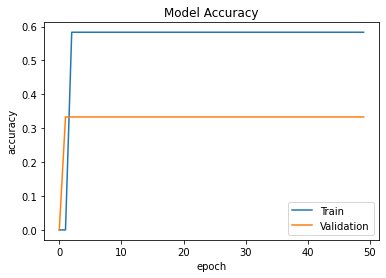

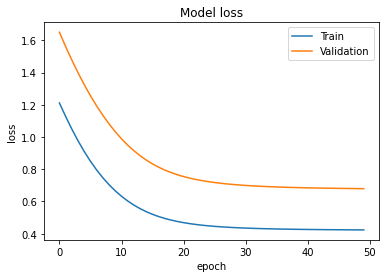

In [ ]:
c_layer(2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               1664      
                                                                 
 dense_35 (Dense)            (None, 32)                4128      
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 1s - loss: 0.8757 - accuracy: 0.583

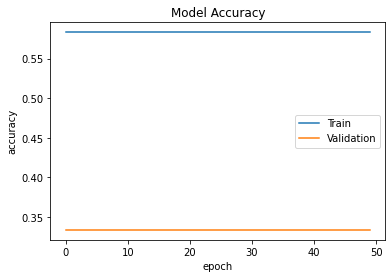

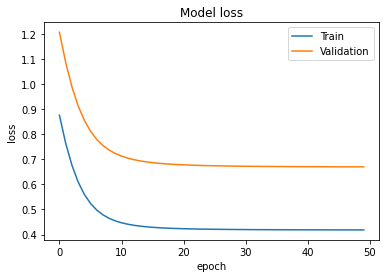

In [ ]:
c_layer(3)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1664      
                                                                 
 dense_40 (Dense)            (None, 32)                4128      
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,993
Trainable params: 8,993
Non-traina

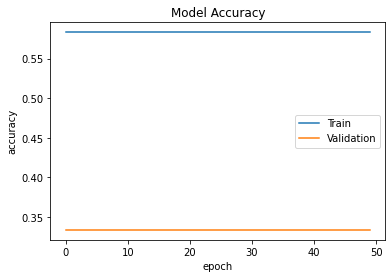

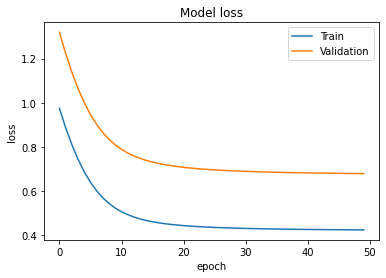

In [ ]:
c_layer(4)